
# **THE DSC USE CASE**


 # **Descriptive and Predictive Analytics Group Project**


**Libraries**

In [680]:
#importing libraries

#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
from pandas import DataFrame
from numpy import array
from matplotlib import pyplot

# visualization
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score,precision_score
from scipy.stats.stats import pearsonr
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

import sys

import warnings
warnings.filterwarnings('ignore')


**Local Library**

In [681]:
sys.path.append(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data")

In [682]:
# Importing local libraries
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

**Import Data**


In [683]:
#Import data files
campaigns = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\campaigns.csv",header=0,sep=';') 
donors = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\donors.csv",header=0,sep=',',index_col=0)
gifts = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\gifts.csv",header=0,sep=',',index_col=0)
donors_6169 = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\selection campaign 6169.csv")  #train_set
donors_7244 = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\selection campaign 7244.csv")  #test_set
donors_7662 = pd.read_csv(r"C:\Users\mkarakoulian1\Desktop\Descriptive & Predictive Analytics\GROUP ASSIGNMENT DSC\Data\Raw\selection campaign 7662 (without gifts).csv")  #real_set

In [684]:
# Checking campaigns dataset
campaigns.head()

campaignID        date lettersSent CostUnit
0         153  13/12/2004       6 873   0,17 €
1         154  01/01/2005       7 656   0,30 €
2         180  18/01/2005       9 933   0,20 €
3         433  29/01/2005       7 448   0,59 €
4         476  12/02/2005       6 605   0,51 €

In [685]:
# Checking details of all columns in campaigns dataset
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


In [686]:
# convert letters sent to numeric
campaigns['lettersSent'] = campaigns['lettersSent'].astype(str).str.replace(' ','').astype(int)
# convert CostUnit to numeric
campaigns['CostUnit'] = campaigns['CostUnit'].astype(str).str.replace('\xa0€','')
campaigns['CostUnit'] = campaigns['CostUnit'].str.replace(',','.').astype(float)
# convert date to date format
campaigns['date'] = pd.to_datetime(campaigns['date'])
campaigns

campaignID       date  lettersSent  CostUnit
0           153 2004-12-13         6873      0.17
1           154 2005-01-01         7656      0.30
2           180 2005-01-18         9933      0.20
3           433 2005-01-29         7448      0.59
4           476 2005-12-02         6605      0.51
..          ...        ...          ...       ...
362        7494 2019-10-17         8539      0.14
363        7503 2019-10-29         6126      0.15
364        7505 2019-11-16        29746      0.12
365        7519 2019-11-26        35199      0.36
366        7536 2019-12-15        37187      0.35

[367 rows x 4 columns]

In [687]:
# Converting above change
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int64         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    int32         
 3   CostUnit     367 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 10.2 KB


In [688]:
# Checking number of null values
campaigns.isnull().sum()

campaignID     0
date           0
lettersSent    0
CostUnit       0
dtype: int64

In [689]:
# Extracting info on campaign 6169
campaign6169 = campaigns[campaigns['campaignID']==6169]
campaign6169

campaignID       date  lettersSent  CostUnit
335        6169 2018-04-09        34888      0.87

In [690]:
# Adding a variable TotalCost (will only work after converting letters sent to numeric)
campaign6169['TotalCost'] = campaign6169['lettersSent'] * campaign6169['CostUnit']
campaign6169

campaignID       date  lettersSent  CostUnit  TotalCost
335        6169 2018-04-09        34888      0.87   30352.56

In [691]:
# Extracting info on campaign 6169
campaign7244 = campaigns[campaigns['campaignID']==7244]
campaign7244

campaignID       date  lettersSent  CostUnit
354        7244 2019-06-18        25645      0.55

In [692]:
# Adding a variable TotalCost (will only work after converting letters sent to numeric)
campaign7244['TotalCost'] = campaign7244['lettersSent'] * campaign7244['CostUnit']
campaign7244

campaignID       date  lettersSent  CostUnit  TotalCost
354        7244 2019-06-18        25645      0.55   14104.75

In [693]:
# Checking donors dataset
donors.head()

donorID  zipcode         province    region gender language dateOfBirth
0   100001   1861.0  Flemish Brabant  Flanders      F       NL  12/24/1967
1   100002   2260.0          Antwerp  Flanders      M       NL  01/14/1952
2   100003   1780.0  Flemish Brabant  Flanders      M       NL  12/23/1986
3   100004   1020.0         Brussels  Brussels      F       FR  03/29/1952
4   100005   1020.0         Brussels  Brussels      F       FR  06/25/1986

In [694]:
# Checking for uniwue province names
donors.groupby('province').count()

donorID  zipcode  region  gender  language  dateOfBirth
province                                                                
ANTWERP              157      157     157     157       157          157
Antwerp            10293    10293   10293   10288     10293        10293
Brussels            1488     1488    1488    1486      1488         1488
East Flanders       9137     9137    9137    9134      9137         9137
Flemish Brabant     6781     6781    6781    6776      6781         6781
Hainaut              944      944     944     944       944          944
Liege                970      970     970     968       970          970
Limburg             4818     4818    4818    4812      4818         4818
Luxembourg           303      303     303     303       303          303
Missing                2        0       2       2         2            2
Namur                401      401     401     400       401          401
Walloon Brabant      433      433     433     432       433          433
West Flanders       8964     8964    8964    8957      8964         8964

In [695]:
# Provine Antewerp is mentioned as ANTWERP, so replace correcting it and replacing with with Antwerp
donors = donors.rename(columns={"ANTWERP": "Antwerp"})
donors.groupby('province').count()

donorID  zipcode  region  gender  language  dateOfBirth
province                                                                
ANTWERP              157      157     157     157       157          157
Antwerp            10293    10293   10293   10288     10293        10293
Brussels            1488     1488    1488    1486      1488         1488
East Flanders       9137     9137    9137    9134      9137         9137
Flemish Brabant     6781     6781    6781    6776      6781         6781
Hainaut              944      944     944     944       944          944
Liege                970      970     970     968       970          970
Limburg             4818     4818    4818    4812      4818         4818
Luxembourg           303      303     303     303       303          303
Missing                2        0       2       2         2            2
Namur                401      401     401     400       401          401
Walloon Brabant      433      433     433     432       433          433
West Flanders       8964     8964    8964    8957      8964         8964

In [696]:
# Checking details of all columns in donors dataset
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      44691 non-null  int64  
 1   zipcode      44689 non-null  float64
 2   province     44691 non-null  object 
 3   region       44691 non-null  object 
 4   gender       44659 non-null  object 
 5   language     44691 non-null  object 
 6   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.7+ MB


In [697]:
# Convert dateofbirth to date
donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])
donors

donorID  zipcode         province    region gender language dateOfBirth
0       100001   1861.0  Flemish Brabant  Flanders      F       NL  1967-12-24
1       100002   2260.0          Antwerp  Flanders      M       NL  1952-01-14
2       100003   1780.0  Flemish Brabant  Flanders      M       NL  1986-12-23
3       100004   1020.0         Brussels  Brussels      F       FR  1952-03-29
4       100005   1020.0         Brussels  Brussels      F       FR  1986-06-25
...        ...      ...              ...       ...    ...      ...         ...
44686   144687   4900.0            Liege  Wallonia      M       FR  1970-09-12
44687   144688   3600.0          Limburg  Flanders      M       NL  1972-11-28
44688   144689   3061.0  Flemish Brabant  Flanders      M       NL  1967-04-21
44689   144690   1950.0  Flemish Brabant  Flanders      M       FR  1976-05-07
44690   144691   1160.0         Brussels  Brussels      M       FR  1987-06-05

[44691 rows x 7 columns]

In [698]:
# Checking number of null values
donors.isnull().sum()

donorID         0
zipcode         2
province        0
region          0
gender         32
language        0
dateOfBirth     0
dtype: int64

In [699]:
# Check the missing values in zipcode
donors[donors['language']=='EN']

donorID  zipcode         province    region gender language dateOfBirth
533     100534   3080.0  Flemish Brabant  Flanders      M       EN  1982-06-07
5019    105020      NaN          Missing   Missing      M       EN  1966-11-09
6634    106635   3080.0  Flemish Brabant  Flanders      F       EN  1966-01-14
22100   122101      NaN          Missing   Missing      F       EN  1975-10-31
26348   126349   3080.0  Flemish Brabant  Flanders      M       EN  1954-06-23
43374   143375   3090.0  Flemish Brabant  Flanders      F       EN  1962-11-07

In [700]:
# Replace the na values in zipcode, province and region
donors['zipcode'] = np.where(donors['zipcode'].isna(), 3080, donors['zipcode'])
donors['province'] = np.where(donors['province']=='Missing', 'Flemish Brabant', donors['province'])
donors['region'] = np.where(donors['region']=='Missing', 'Flanders', donors['region'])
donors

donorID  zipcode         province    region gender language dateOfBirth
0       100001   1861.0  Flemish Brabant  Flanders      F       NL  1967-12-24
1       100002   2260.0          Antwerp  Flanders      M       NL  1952-01-14
2       100003   1780.0  Flemish Brabant  Flanders      M       NL  1986-12-23
3       100004   1020.0         Brussels  Brussels      F       FR  1952-03-29
4       100005   1020.0         Brussels  Brussels      F       FR  1986-06-25
...        ...      ...              ...       ...    ...      ...         ...
44686   144687   4900.0            Liege  Wallonia      M       FR  1970-09-12
44687   144688   3600.0          Limburg  Flanders      M       NL  1972-11-28
44688   144689   3061.0  Flemish Brabant  Flanders      M       NL  1967-04-21
44689   144690   1950.0  Flemish Brabant  Flanders      M       FR  1976-05-07
44690   144691   1160.0         Brussels  Brussels      M       FR  1987-06-05

[44691 rows x 7 columns]

In [701]:
# Convert zipcode to integer
donors['zipcode'] = donors['zipcode'].astype(int)
donors

donorID  zipcode         province    region gender language dateOfBirth
0       100001     1861  Flemish Brabant  Flanders      F       NL  1967-12-24
1       100002     2260          Antwerp  Flanders      M       NL  1952-01-14
2       100003     1780  Flemish Brabant  Flanders      M       NL  1986-12-23
3       100004     1020         Brussels  Brussels      F       FR  1952-03-29
4       100005     1020         Brussels  Brussels      F       FR  1986-06-25
...        ...      ...              ...       ...    ...      ...         ...
44686   144687     4900            Liege  Wallonia      M       FR  1970-09-12
44687   144688     3600          Limburg  Flanders      M       NL  1972-11-28
44688   144689     3061  Flemish Brabant  Flanders      M       NL  1967-04-21
44689   144690     1950  Flemish Brabant  Flanders      M       FR  1976-05-07
44690   144691     1160         Brussels  Brussels      M       FR  1987-06-05

[44691 rows x 7 columns]

In [702]:
# Check zipcodes for the Walloon Brabant province (the province of the 0 value)
donors[donors['province']=='Walloon Brabant']

donorID  zipcode         province    region gender language dateOfBirth
49      100050     1331  Walloon Brabant  Wallonia      F       FR  1956-01-26
105     100106     1420  Walloon Brabant  Wallonia      F       FR  1960-01-29
122     100123     1400  Walloon Brabant  Wallonia      M       FR  1960-07-17
196     100197     1340  Walloon Brabant  Wallonia      F       FR  1961-10-19
206     100207     1315  Walloon Brabant  Wallonia      F       FR  1972-11-18
...        ...      ...              ...       ...    ...      ...         ...
44428   144429     1420  Walloon Brabant  Wallonia      F       FR  1976-10-07
44448   144449     1390  Walloon Brabant  Wallonia      M       FR  1969-03-01
44466   144467     1300  Walloon Brabant  Wallonia      M       FR  1985-01-05
44521   144522     1390  Walloon Brabant  Wallonia      M       FR  1981-10-20
44614   144615     1400  Walloon Brabant  Wallonia      M       FR  1967-01-26

[433 rows x 7 columns]

In [703]:
# Check zipcode with the highest occurance
donors[donors['province']=='Walloon Brabant'].groupby('zipcode')['zipcode'].count().sort_values(ascending=False).head(10)

zipcode
1410    51
1400    33
1300    32
1380    30
1420    27
1330    24
1370    17
1390    16
1310    15
1480    14
Name: zipcode, dtype: int64

In [704]:
# Replace the 0 value with 1410 (the zipcode with the highest occurence within Walloon Brabant province)
donors['zipcode']= np.where(donors['zipcode']==0, 1410,donors['zipcode'])
donors

donorID  zipcode         province    region gender language dateOfBirth
0       100001     1861  Flemish Brabant  Flanders      F       NL  1967-12-24
1       100002     2260          Antwerp  Flanders      M       NL  1952-01-14
2       100003     1780  Flemish Brabant  Flanders      M       NL  1986-12-23
3       100004     1020         Brussels  Brussels      F       FR  1952-03-29
4       100005     1020         Brussels  Brussels      F       FR  1986-06-25
...        ...      ...              ...       ...    ...      ...         ...
44686   144687     4900            Liege  Wallonia      M       FR  1970-09-12
44687   144688     3600          Limburg  Flanders      M       NL  1972-11-28
44688   144689     3061  Flemish Brabant  Flanders      M       NL  1967-04-21
44689   144690     1950  Flemish Brabant  Flanders      M       FR  1976-05-07
44690   144691     1160         Brussels  Brussels      M       FR  1987-06-05

[44691 rows x 7 columns]

In [705]:
# Check the number of of male and female donors in the dataset
donors.groupby('gender')['donorID'].count()

gender
F    18868
M    25791
Name: donorID, dtype: int64

In [706]:
# Replace the null values in gender with the gender that has the highest share
donors['gender'] = donors['gender'].fillna('M')
donors

donorID  zipcode         province    region gender language dateOfBirth
0       100001     1861  Flemish Brabant  Flanders      F       NL  1967-12-24
1       100002     2260          Antwerp  Flanders      M       NL  1952-01-14
2       100003     1780  Flemish Brabant  Flanders      M       NL  1986-12-23
3       100004     1020         Brussels  Brussels      F       FR  1952-03-29
4       100005     1020         Brussels  Brussels      F       FR  1986-06-25
...        ...      ...              ...       ...    ...      ...         ...
44686   144687     4900            Liege  Wallonia      M       FR  1970-09-12
44687   144688     3600          Limburg  Flanders      M       NL  1972-11-28
44688   144689     3061  Flemish Brabant  Flanders      M       NL  1967-04-21
44689   144690     1950  Flemish Brabant  Flanders      M       FR  1976-05-07
44690   144691     1160         Brussels  Brussels      M       FR  1987-06-05

[44691 rows x 7 columns]

In [707]:
# calculate the age 
donors['birth_year'] = donors['dateOfBirth'].astype(str).str[:4].astype(int)
donors['age'] = 2019 - donors['birth_year']
donors = donors.drop(['birth_year', 'dateOfBirth'], axis=1)

In [708]:
# Make sure there are no missing values left
donors.isna().sum()

donorID     0
zipcode     0
province    0
region      0
gender      0
language    0
age         0
dtype: int64

In [709]:
# Clean the donors list in campaign 7662
donors_7662['donorID'] = donors_7662['donorID'].str.replace("D", "").astype(int)
donors_7662

donorID
0       134242
1       126503
2       104392
3       105905
4       120506
...        ...
26517   114719
26518   134824
26519   143259
26520   123936
26521   128576

[26522 rows x 1 columns]

In [710]:
# Inspect the gifts table
gifts.head()

donorID  campaignID amount        date
0   100001         NaN  12,39  2004-03-23
1   100001      1577.0  12,39  2007-10-11
2   100001      1634.0   6,69  2007-12-28
3   100001      1778.0  24,79  2008-06-14
4   100001      1808.0   7,44  2008-07-09

In [711]:
# Check the data types
gifts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.3+ MB


In [712]:
gifts.shape

(216594, 4)

In [713]:
# Convert amount to float
gifts['amount'] = gifts['amount'].str.replace(',','.').astype(float)
gifts

donorID  campaignID  amount        date
0        100001         NaN   12.39  2004-03-23
1        100001      1577.0   12.39  2007-10-11
2        100001      1634.0    6.69  2007-12-28
3        100001      1778.0   24.79  2008-06-14
4        100001      1808.0    7.44  2008-07-09
...         ...         ...     ...         ...
216589   265584      6169.0  300.00  2018-09-23
216590   281770      6169.0   30.00  2018-09-08
216591   317880      6169.0  157.50  2018-09-12
216592   480980      6169.0   36.00  2018-09-12
216593  1474536      6169.0  183.00  2018-09-10

[216594 rows x 4 columns]

In [714]:
# Creating a dataframe to visualize and notice outliers 
sorted = gifts.sort_values('amount', ascending=False)
sorted.head(10)

donorID  campaignID      amount        date
153012   123168         NaN  4000000.00  2010-04-26
141895   120861      1917.0  2479000.00  2008-11-17
150654   122679      2417.0    30000.00  2010-07-04
182959   130966      1377.0    12394.68  2007-04-21
21410    102552      3785.0     5000.00  2014-05-03
172833   128065         NaN     4000.00  2010-03-12
53184    105960         NaN     3718.40  2004-11-16
184130   131307         NaN     3600.00  2012-11-12
210918   142006         NaN     3198.00  2016-02-10
79841    109635      2360.0     2500.00  2010-03-30

In [715]:
# Visualize amounts to spot the outliers
viz = px.box(gifts, y="amount")
viz.show()

In [716]:
# Saving all outliers in gufts dataset
outliers = gifts[gifts['amount']>5000]
outliers

donorID  campaignID      amount        date
141895   120861      1917.0  2479000.00  2008-11-17
150654   122679      2417.0    30000.00  2010-07-04
153012   123168         NaN  4000000.00  2010-04-26
182959   130966      1377.0    12394.68  2007-04-21

In [717]:
# Remove the outliers that do not have previous donation amount 
gifts.drop([141895,182959], inplace = True)
gifts

donorID  campaignID  amount        date
0        100001         NaN   12.39  2004-03-23
1        100001      1577.0   12.39  2007-10-11
2        100001      1634.0    6.69  2007-12-28
3        100001      1778.0   24.79  2008-06-14
4        100001      1808.0    7.44  2008-07-09
...         ...         ...     ...         ...
216589   265584      6169.0  300.00  2018-09-23
216590   281770      6169.0   30.00  2018-09-08
216591   317880      6169.0  157.50  2018-09-12
216592   480980      6169.0   36.00  2018-09-12
216593  1474536      6169.0  183.00  2018-09-10

[216592 rows x 4 columns]

In [718]:
# Replace the outliers that have previous donation amounts with their average
gifts['amount'] = np.where(gifts['amount'] >=5000, 30, gifts['amount'])
gifts

donorID  campaignID  amount        date
0        100001         NaN   12.39  2004-03-23
1        100001      1577.0   12.39  2007-10-11
2        100001      1634.0    6.69  2007-12-28
3        100001      1778.0   24.79  2008-06-14
4        100001      1808.0    7.44  2008-07-09
...         ...         ...     ...         ...
216589   265584      6169.0  300.00  2018-09-23
216590   281770      6169.0   30.00  2018-09-08
216591   317880      6169.0  157.50  2018-09-12
216592   480980      6169.0   36.00  2018-09-12
216593  1474536      6169.0  183.00  2018-09-10

[216592 rows x 4 columns]

In [719]:
# make sure outliers are gone
viz2 = px.box(gifts, y="amount")
viz2.show()

In [720]:
# Check for Null values
gifts.isna().sum()

donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

In [721]:
# Convert date to datetime
gifts['date'] = pd.to_datetime(gifts['date'])
gifts

donorID  campaignID  amount       date
0        100001         NaN   12.39 2004-03-23
1        100001      1577.0   12.39 2007-10-11
2        100001      1634.0    6.69 2007-12-28
3        100001      1778.0   24.79 2008-06-14
4        100001      1808.0    7.44 2008-07-09
...         ...         ...     ...        ...
216589   265584      6169.0  300.00 2018-09-23
216590   281770      6169.0   30.00 2018-09-08
216591   317880      6169.0  157.50 2018-09-12
216592   480980      6169.0   36.00 2018-09-12
216593  1474536      6169.0  183.00 2018-09-10

[216592 rows x 4 columns]

In [722]:
# Create the target variable (DV) for donors who have donated more than 30 Euros to campaign 6169
donated6169 = gifts[gifts['campaignID']==6169] 
donated6169['donated_6169'] = 0
donated6169.loc[donated6169['amount']>=30, 'donated_6169'] = 1
donated6169 = donated6169[['donorID', 'donated_6169']]
donated6169

donorID  donated_6169
132      100023             0
705      100126             1
1151     100253             1
1362     100279             1
1804     100320             1
...         ...           ...
216589   265584             1
216590   281770             1
216591   317880             1
216592   480980             1
216593  1474536             1

[1191 rows x 2 columns]

In [723]:
# Create the target variable (DV) for donors who have donated more than 30 Euros to campaign 7244
donated7244 = gifts[gifts['campaignID']==7244] 
donated7244['donated_7244'] = 0
donated7244.loc[donated7244['amount']>=30, 'donated_7244'] = 1
donated7244 = donated7244[['donorID', 'donated_7244']]
donated7244

donorID  donated_7244
5828     100724             1
7527     100896             0
8314     100964             1
9269     101066             1
9316     101069             1
...         ...           ...
214899   144369             0
214914   144371             1
215729   144481             1
215878   144512             0
215956   144546             0

[361 rows x 2 columns]

In [724]:
# Checking number of null values in gifts dataset
gifts.isnull().sum()

donorID           0
campaignID    15637
amount            0
date              0
dtype: int64

In [725]:
# Subset for Train and test data
gifts_train = gifts[(gifts['date'] >= '2014-08-04') & (gifts['date'] <= '2018-08-04')]
gifts_test = gifts[(gifts['date'] >= '2015-06-18') & (gifts['date'] <= '2019-06-18')]
gifts_real = gifts[(gifts['date'] >= '2016-02-01') & (gifts['date'] <= '2020-02-01')]

In [726]:
# Calculating the recency of the train set
recency6169 = gifts_train.groupby('donorID')['date'].agg('max')
recency6169 = recency6169.reset_index()
recency6169['recency'] = round((pd.to_datetime('2018-09-04', format='%Y-%m-%d') - recency6169['date'])/np.timedelta64(1,'M'),2)
recency6169

donorID       date  recency
0       100002 2015-01-10    43.80
1       100003 2018-07-08     1.91
2       100005 2018-06-19     2.53
3       100006 2017-08-15    12.65
4       100007 2017-11-30     9.13
...        ...        ...      ...
17404   144687 2015-11-06    33.94
17405   144688 2017-07-27    13.27
17406   144689 2018-06-25     2.33
17407   144690 2014-12-30    44.16
17408   144691 2015-12-03    33.05

[17409 rows x 3 columns]

In [727]:
# Calculating the frequency (No of campaigns) of the train set
frequency6169 = gifts_train.groupby('donorID')['campaignID'].agg('count')
frequency6169 = frequency6169.reset_index()
frequency6169 = frequency6169.rename(columns={'campaignID':'No_of_campaigns'})
frequency6169

donorID  No_of_campaigns
0       100002                1
1       100003                5
2       100005                2
3       100006                1
4       100007                2
...        ...              ...
17404   144687                1
17405   144688                1
17406   144689                1
17407   144690                1
17408   144691                1

[17409 rows x 2 columns]

In [728]:
# Calculating monetary value of the train set
monetary6169 = gifts_train.groupby('donorID')['amount'].agg(['sum','mean','max','min'])
monetary6169 = monetary6169.reset_index()
monetary6169 = monetary6169.rename(columns={'sum':'Total_Amount','mean':'Average_Amount','max':'Maximum_Amount','min':'Minimum_Amount'})
monetary6169

donorID  Total_Amount  Average_Amount  Maximum_Amount  Minimum_Amount
0       100002          20.0            20.0            20.0            20.0
1       100003          18.0             3.6             5.0             3.0
2       100005          10.0             5.0             5.0             5.0
3       100006           5.0             5.0             5.0             5.0
4       100007          70.0            35.0            40.0            30.0
...        ...           ...             ...             ...             ...
17404   144687          10.0            10.0            10.0            10.0
17405   144688          15.0            15.0            15.0            15.0
17406   144689         100.0           100.0           100.0           100.0
17407   144690          40.0            40.0            40.0            40.0
17408   144691          39.0            39.0            39.0            39.0

[17409 rows x 5 columns]

In [729]:
# Calculating the recency of the test set
recency7244 = gifts_test.groupby('donorID')['date'].agg('max')
recency7244 = recency7244.reset_index()
recency7244['recency'] = round((pd.to_datetime('2019-06-18', format='%Y-%m-%d') - recency7244['date'])/np.timedelta64(1,'M'),2)
recency7244

donorID       date  recency
0       100003 2019-06-17     0.03
1       100005 2019-04-18     2.00
2       100006 2017-08-15    22.08
3       100007 2017-11-30    18.56
4       100011 2015-12-02    42.51
...        ...        ...      ...
13176   265584 2018-09-23     8.81
13177   281770 2018-09-08     9.30
13178   317880 2018-09-12     9.17
13179   480980 2018-09-12     9.17
13180  1474536 2018-09-10     9.23

[13181 rows x 3 columns]

In [730]:
# Calculating the frequency (No of campaigns) of the test set
frequency7244 = gifts_test.groupby('donorID')['campaignID'].agg('count')
frequency7244 = frequency7244.reset_index()
frequency7244 = frequency7244.rename(columns={'campaignID':'No_of_campaigns'})
frequency7244

donorID  No_of_campaigns
0       100003               12
1       100005                3
2       100006                1
3       100007                2
4       100011                1
...        ...              ...
13176   265584                1
13177   281770                1
13178   317880                1
13179   480980                1
13180  1474536                1

[13181 rows x 2 columns]

In [731]:
# Calculating monetary value of the test set
monetary7244 = gifts_test.groupby('donorID')['amount'].agg(['sum','mean','max','min'])
monetary7244 = monetary7244.reset_index()
monetary7244 = monetary7244.rename(columns={'sum':'Total_Amount','mean':'Average_Amount','max':'Maximum_Amount','min':'Minimum_Amount'})
monetary7244

donorID  Total_Amount  Average_Amount  Maximum_Amount  Minimum_Amount
0       100003          46.0        3.833333             5.0             3.0
1       100005          20.0        6.666667            10.0             5.0
2       100006           5.0        5.000000             5.0             5.0
3       100007          70.0       35.000000            40.0            30.0
4       100011         100.0      100.000000           100.0           100.0
...        ...           ...             ...             ...             ...
13176   265584         300.0      300.000000           300.0           300.0
13177   281770          30.0       30.000000            30.0            30.0
13178   317880         157.5      157.500000           157.5           157.5
13179   480980          36.0       36.000000            36.0            36.0
13180  1474536         183.0      183.000000           183.0           183.0

[13181 rows x 5 columns]

In [732]:
# Calculating the recency of the real set
recency7662 = gifts_real.groupby('donorID')['date'].agg('max')
recency7662 = recency7662.reset_index()
recency7662['recency'] = round((pd.to_datetime('2020-02-01', format='%Y-%m-%d') - recency7662['date'])/np.timedelta64(1,'M'),2)
recency7662

donorID       date  recency
0       100003 2019-06-17     7.52
1       100005 2019-04-18     9.50
2       100006 2017-08-15    29.57
3       100007 2017-11-30    26.05
4       100015 2017-07-11    30.72
...        ...        ...      ...
11595   265584 2018-09-23    16.30
11596   281770 2018-09-08    16.79
11597   317880 2018-09-12    16.66
11598   480980 2018-09-12    16.66
11599  1474536 2018-09-10    16.72

[11600 rows x 3 columns]

In [733]:
# Calculating the frequency (No of campaigns) of the real set
frequency7662 = gifts_real.groupby('donorID')['campaignID'].agg('count')
frequency7662 = frequency7662.reset_index()
frequency7662 = frequency7662.rename(columns={'campaignID':'No_of_campaigns'})
frequency7662

donorID  No_of_campaigns
0       100003               12
1       100005                3
2       100006                1
3       100007                1
4       100015                4
...        ...              ...
11595   265584                1
11596   281770                1
11597   317880                1
11598   480980                1
11599  1474536                1

[11600 rows x 2 columns]

In [734]:
# Calculate monetary value of the real set
monetary7662 = gifts_real.groupby('donorID')['amount'].agg(['sum','mean','max','min'])
monetary7662 = monetary7662.reset_index()
monetary7662 = monetary7662.rename(columns={'sum':'Total_Amount','mean':'Average_Amount','max':'Maximum_Amount','min':'Minimum_Amount'})
monetary7662

donorID  Total_Amount  Average_Amount  Maximum_Amount  Minimum_Amount
0       100003          46.0        3.833333             5.0             3.0
1       100005          20.0        6.666667            10.0             5.0
2       100006           5.0        5.000000             5.0             5.0
3       100007          40.0       40.000000            40.0            40.0
4       100015          40.0       10.000000            20.0             5.0
...        ...           ...             ...             ...             ...
11595   265584         300.0      300.000000           300.0           300.0
11596   281770          30.0       30.000000            30.0            30.0
11597   317880         157.5      157.500000           157.5           157.5
11598   480980          36.0       36.000000            36.0            36.0
11599  1474536         183.0      183.000000           183.0           183.0

[11600 rows x 5 columns]

Merging the tables

In [735]:
# Create the train set
train_set = donors_6169.merge(donors, on='donorID', how='left')
train_set = train_set.merge(recency6169, on='donorID', how='left')
train_set = train_set.merge(frequency6169, on='donorID', how='left')
train_set = train_set.merge(monetary6169, on='donorID', how='left')
train_set = train_set.merge(donated6169, on='donorID', how='left')
train_set

donorID  zipcode         province    region gender language   age  \
0       100001   1861.0  Flemish Brabant  Flanders      F       NL  52.0   
1       100002   2260.0          Antwerp  Flanders      M       NL  67.0   
2       100004   1020.0         Brussels  Brussels      F       FR  67.0   
3       100008   1780.0  Flemish Brabant  Flanders      M       FR  82.0   
4       100009   1020.0         Brussels  Brussels      M       FR  87.0   
...        ...      ...              ...       ...    ...      ...   ...   
34883   144686   2440.0          Antwerp  Flanders      F       NL  55.0   
34884   144687   4900.0            Liege  Wallonia      M       FR  49.0   
34885   144689   3061.0  Flemish Brabant  Flanders      M       NL  52.0   
34886   144690   1950.0  Flemish Brabant  Flanders      M       FR  43.0   
34887   144691   1160.0         Brussels  Brussels      M       FR  32.0   

            date  recency  No_of_campaigns  Total_Amount  Average_Amount  \
0            NaT      NaN              NaN           NaN             NaN   
1     2015-01-10    43.80              1.0          20.0            20.0   
2            NaT      NaN              NaN           NaN             NaN   
3            NaT      NaN              NaN           NaN             NaN   
4            NaT      NaN              NaN           NaN             NaN   
...          ...      ...              ...           ...             ...   
34883 2015-04-28    40.25              1.0          50.0            50.0   
34884 2015-11-06    33.94              1.0          10.0            10.0   
34885 2018-06-25     2.33              1.0         100.0           100.0   
34886 2014-12-30    44.16              1.0          40.0            40.0   
34887 2015-12-03    33.05              1.0          39.0            39.0   

       Maximum_Amount  Minimum_Amount  donated_6169  
0                 NaN             NaN           NaN  
1                20.0            20.0           NaN  
2                 NaN             NaN           NaN  
3                 NaN             NaN           NaN  
4                 NaN             NaN           NaN  
...               ...             ...           ...  
34883            50.0            50.0           NaN  
34884            10.0            10.0           NaN  
34885           100.0           100.0           NaN  
34886            40.0            40.0           NaN  
34887            39.0            39.0           NaN  

[34888 rows x 15 columns]

In [736]:
# Drop the unwanted columns
train_set = train_set.drop(['zipcode', 'date'], axis=1)

In [737]:
train_set.isna().sum()

donorID                0
province              14
region                14
gender                14
language              14
age                   14
recency            26186
No_of_campaigns    26186
Total_Amount       26186
Average_Amount     26186
Maximum_Amount     26186
Minimum_Amount     26186
donated_6169       33697
dtype: int64

In [738]:
# Replace Nan in age with the median value and convert to integer
train_set['age'] = train_set['age'].replace(np.nan, np.nanmedian(train_set['age'])).astype(int)
train_set.isna().sum()

donorID                0
province              14
region                14
gender                14
language              14
age                    0
recency            26186
No_of_campaigns    26186
Total_Amount       26186
Average_Amount     26186
Maximum_Amount     26186
Minimum_Amount     26186
donated_6169       33697
dtype: int64

In [739]:
# Checking data types of training dataset
train_set.dtypes

donorID              int64
province            object
region              object
gender              object
language            object
age                  int32
recency            float64
No_of_campaigns    float64
Total_Amount       float64
Average_Amount     float64
Maximum_Amount     float64
Minimum_Amount     float64
donated_6169       float64
dtype: object

In [740]:
# Replace the null values in numerical variables with 0
list_num = train_set.select_dtypes(include='float64').columns.tolist()
train_set[list_num] = train_set[list_num].fillna(0).astype(int)
train_set.isna().sum()

donorID             0
province           14
region             14
gender             14
language           14
age                 0
recency             0
No_of_campaigns     0
Total_Amount        0
Average_Amount      0
Maximum_Amount      0
Minimum_Amount      0
donated_6169        0
dtype: int64

In [741]:
# Drop the null values in categorical variables (to few, not worth the hassle)
train_set = train_set.dropna(subset=['province', 'region', 'gender', 'language'])
train_set.isna().sum()

donorID            0
province           0
region             0
gender             0
language           0
age                0
recency            0
No_of_campaigns    0
Total_Amount       0
Average_Amount     0
Maximum_Amount     0
Minimum_Amount     0
donated_6169       0
dtype: int64

In [742]:
# Checking training data set
train_set.head()

donorID         province    region gender language  age  recency  \
0   100001  Flemish Brabant  Flanders      F       NL   52        0   
1   100002          Antwerp  Flanders      M       NL   67       43   
2   100004         Brussels  Brussels      F       FR   67        0   
3   100008  Flemish Brabant  Flanders      M       FR   82        0   
4   100009         Brussels  Brussels      M       FR   87        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                1            20              20              20   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   Minimum_Amount  donated_6169  
0               0             0  
1              20             0  
2               0             0  
3               0             0  
4               0             0

In [743]:
# Create the test set
test_set = donors_7244.merge(donors, on='donorID', how='left')
test_set = test_set.merge(recency7244, on='donorID', how='left')
test_set = test_set.merge(frequency7244, on='donorID', how='left')
test_set = test_set.merge(monetary7244, on='donorID', how='left')
test_set = test_set.merge(donated7244, on='donorID', how='left')
test_set

donorID  zipcode         province    region gender language  age  \
0       100001     1861  Flemish Brabant  Flanders      F       NL   52   
1       100002     2260          Antwerp  Flanders      M       NL   67   
2       100008     1780  Flemish Brabant  Flanders      M       FR   82   
3       100009     1020         Brussels  Brussels      M       FR   87   
4       100010     1020         Brussels  Brussels      M       FR   36   
...        ...      ...              ...       ...    ...      ...  ...   
25640   144682     1640  Flemish Brabant  Flanders      M       FR   37   
25641   144683     9308    East Flanders  Flanders      M       NL   34   
25642   144686     2440          Antwerp  Flanders      F       NL   55   
25643   144690     1950  Flemish Brabant  Flanders      M       FR   43   
25644   144691     1160         Brussels  Brussels      M       FR   32   

            date  recency  No_of_campaigns  Total_Amount  Average_Amount  \
0            NaT      NaN              NaN           NaN             NaN   
1            NaT      NaN              NaN           NaN             NaN   
2            NaT      NaN              NaN           NaN             NaN   
3            NaT      NaN              NaN           NaN             NaN   
4            NaT      NaN              NaN           NaN             NaN   
...          ...      ...              ...           ...             ...   
25640 2016-08-10    34.23              1.0          40.0            40.0   
25641 2015-10-11    44.22              0.0          50.0            50.0   
25642        NaT      NaN              NaN           NaN             NaN   
25643        NaT      NaN              NaN           NaN             NaN   
25644 2015-12-03    42.48              1.0          39.0            39.0   

       Maximum_Amount  Minimum_Amount  donated_7244  
0                 NaN             NaN           NaN  
1                 NaN             NaN           NaN  
2                 NaN             NaN           NaN  
3                 NaN             NaN           NaN  
4                 NaN             NaN           NaN  
...               ...             ...           ...  
25640            40.0            40.0           NaN  
25641            50.0            50.0           NaN  
25642             NaN             NaN           NaN  
25643             NaN             NaN           NaN  
25644            39.0            39.0           NaN  

[25645 rows x 15 columns]

In [744]:
# Drop the unwanted columns
test_set = test_set.drop(['zipcode', 'date'], axis=1)
test_set

donorID         province    region gender language  age  recency  \
0       100001  Flemish Brabant  Flanders      F       NL   52      NaN   
1       100002          Antwerp  Flanders      M       NL   67      NaN   
2       100008  Flemish Brabant  Flanders      M       FR   82      NaN   
3       100009         Brussels  Brussels      M       FR   87      NaN   
4       100010         Brussels  Brussels      M       FR   36      NaN   
...        ...              ...       ...    ...      ...  ...      ...   
25640   144682  Flemish Brabant  Flanders      M       FR   37    34.23   
25641   144683    East Flanders  Flanders      M       NL   34    44.22   
25642   144686          Antwerp  Flanders      F       NL   55      NaN   
25643   144690  Flemish Brabant  Flanders      M       FR   43      NaN   
25644   144691         Brussels  Brussels      M       FR   32    42.48   

       No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                  NaN           NaN             NaN             NaN   
1                  NaN           NaN             NaN             NaN   
2                  NaN           NaN             NaN             NaN   
3                  NaN           NaN             NaN             NaN   
4                  NaN           NaN             NaN             NaN   
...                ...           ...             ...             ...   
25640              1.0          40.0            40.0            40.0   
25641              0.0          50.0            50.0            50.0   
25642              NaN           NaN             NaN             NaN   
25643              NaN           NaN             NaN             NaN   
25644              1.0          39.0            39.0            39.0   

       Minimum_Amount  donated_7244  
0                 NaN           NaN  
1                 NaN           NaN  
2                 NaN           NaN  
3                 NaN           NaN  
4                 NaN           NaN  
...               ...           ...  
25640            40.0           NaN  
25641            50.0           NaN  
25642             NaN           NaN  
25643             NaN           NaN  
25644            39.0           NaN  

[25645 rows x 13 columns]

In [745]:
# Checking nul values
test_set.isna().sum()

donorID                0
province               0
region                 0
gender                 0
language               0
age                    0
recency            21859
No_of_campaigns    21859
Total_Amount       21859
Average_Amount     21859
Maximum_Amount     21859
Minimum_Amount     21859
donated_7244       25284
dtype: int64

In [746]:
test_set.dtypes

donorID              int64
province            object
region              object
gender              object
language            object
age                  int32
recency            float64
No_of_campaigns    float64
Total_Amount       float64
Average_Amount     float64
Maximum_Amount     float64
Minimum_Amount     float64
donated_7244       float64
dtype: object

In [747]:
# Replace the null values in numerical variables with 0
list_num = test_set.select_dtypes(include='float64').columns.tolist()
test_set[list_num] = test_set[list_num].fillna(0).astype(int)
test_set.isna().sum()

donorID            0
province           0
region             0
gender             0
language           0
age                0
recency            0
No_of_campaigns    0
Total_Amount       0
Average_Amount     0
Maximum_Amount     0
Minimum_Amount     0
donated_7244       0
dtype: int64

In [748]:
# Checking test dataset
test_set.head()

donorID         province    region gender language  age  recency  \
0   100001  Flemish Brabant  Flanders      F       NL   52        0   
1   100002          Antwerp  Flanders      M       NL   67        0   
2   100008  Flemish Brabant  Flanders      M       FR   82        0   
3   100009         Brussels  Brussels      M       FR   87        0   
4   100010         Brussels  Brussels      M       FR   36        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   Minimum_Amount  donated_7244  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0

In [749]:
# Create the real set
real_set = donors_7662.merge(donors, on='donorID', how='left')
real_set = real_set.merge(recency7662, on='donorID', how='left')
real_set = real_set.merge(frequency7662, on='donorID', how='left')
real_set = real_set.merge(monetary7662, on='donorID', how='left')
real_set = real_set.merge(donated7244,on='donorID',how='left')
real_set

donorID  zipcode       province    region gender language   age  \
0       134242   3580.0        Limburg  Flanders      M       NL  53.0   
1       126503   4250.0          Liege  Wallonia      M       FR  70.0   
2       104392   4820.0          Liege  Wallonia      F       FR  45.0   
3       105905   8370.0  West Flanders  Flanders      M       NL  49.0   
4       120506   8020.0  West Flanders  Flanders      M       NL  46.0   
...        ...      ...            ...       ...    ...      ...   ...   
26517   114719   8560.0  West Flanders  Flanders      M       NL  47.0   
26518   134824   2920.0        Antwerp  Flanders      M       NL  44.0   
26519   143259   8430.0  West Flanders  Flanders      M       NL  24.0   
26520   123936   9880.0  East Flanders  Flanders      M       NL  42.0   
26521   128576   8610.0  West Flanders  Flanders      M       NL  48.0   

            date  recency  No_of_campaigns  Total_Amount  Average_Amount  \
0            NaT      NaN              NaN           NaN             NaN   
1            NaT      NaN              NaN           NaN             NaN   
2            NaT      NaN              NaN           NaN             NaN   
3     2019-11-29     2.10              2.0         210.0            70.0   
4            NaT      NaN              NaN           NaN             NaN   
...          ...      ...              ...           ...             ...   
26517        NaT      NaN              NaN           NaN             NaN   
26518        NaT      NaN              NaN           NaN             NaN   
26519 2016-10-26    39.20              1.0          40.0            40.0   
26520 2017-07-05    30.92              1.0          20.0            20.0   
26521        NaT      NaN              NaN           NaN             NaN   

       Maximum_Amount  Minimum_Amount  donated_7244  
0                 NaN             NaN           NaN  
1                 NaN             NaN           NaN  
2                 NaN             NaN           NaN  
3               100.0            55.0           1.0  
4                 NaN             NaN           NaN  
...               ...             ...           ...  
26517             NaN             NaN           NaN  
26518             NaN             NaN           NaN  
26519            40.0            40.0           NaN  
26520            20.0            20.0           NaN  
26521             NaN             NaN           NaN  

[26522 rows x 15 columns]

In [750]:
# Drop the unwanted columns
real_set = real_set.drop(['zipcode', 'date'], axis=1)
real_set

donorID       province    region gender language   age  recency  \
0       134242        Limburg  Flanders      M       NL  53.0      NaN   
1       126503          Liege  Wallonia      M       FR  70.0      NaN   
2       104392          Liege  Wallonia      F       FR  45.0      NaN   
3       105905  West Flanders  Flanders      M       NL  49.0     2.10   
4       120506  West Flanders  Flanders      M       NL  46.0      NaN   
...        ...            ...       ...    ...      ...   ...      ...   
26517   114719  West Flanders  Flanders      M       NL  47.0      NaN   
26518   134824        Antwerp  Flanders      M       NL  44.0      NaN   
26519   143259  West Flanders  Flanders      M       NL  24.0    39.20   
26520   123936  East Flanders  Flanders      M       NL  42.0    30.92   
26521   128576  West Flanders  Flanders      M       NL  48.0      NaN   

       No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                  NaN           NaN             NaN             NaN   
1                  NaN           NaN             NaN             NaN   
2                  NaN           NaN             NaN             NaN   
3                  2.0         210.0            70.0           100.0   
4                  NaN           NaN             NaN             NaN   
...                ...           ...             ...             ...   
26517              NaN           NaN             NaN             NaN   
26518              NaN           NaN             NaN             NaN   
26519              1.0          40.0            40.0            40.0   
26520              1.0          20.0            20.0            20.0   
26521              NaN           NaN             NaN             NaN   

       Minimum_Amount  donated_7244  
0                 NaN           NaN  
1                 NaN           NaN  
2                 NaN           NaN  
3                55.0           1.0  
4                 NaN           NaN  
...               ...           ...  
26517             NaN           NaN  
26518             NaN           NaN  
26519            40.0           NaN  
26520            20.0           NaN  
26521             NaN           NaN  

[26522 rows x 13 columns]

In [751]:
real_set.isna().sum()

donorID                0
province              11
region                11
gender                11
language              11
age                   11
recency            19204
No_of_campaigns    19204
Total_Amount       19204
Average_Amount     19204
Maximum_Amount     19204
Minimum_Amount     19204
donated_7244       26164
dtype: int64

In [752]:
real_set.dtypes

donorID              int32
province            object
region              object
gender              object
language            object
age                float64
recency            float64
No_of_campaigns    float64
Total_Amount       float64
Average_Amount     float64
Maximum_Amount     float64
Minimum_Amount     float64
donated_7244       float64
dtype: object

In [753]:
# Replace Nan in age with the median value and convert to integer
real_set['age'] = real_set['age'].replace(np.nan, np.nanmedian(real_set['age'])).astype(int)
real_set.isna().sum()

donorID                0
province              11
region                11
gender                11
language              11
age                    0
recency            19204
No_of_campaigns    19204
Total_Amount       19204
Average_Amount     19204
Maximum_Amount     19204
Minimum_Amount     19204
donated_7244       26164
dtype: int64

In [754]:
# Replace the null values in numerical variables with 0
list_num = real_set.select_dtypes(include='float64').columns.tolist()
real_set[list_num] = real_set[list_num].fillna(0).astype(int)
real_set.isna().sum()

donorID             0
province           11
region             11
gender             11
language           11
age                 0
recency             0
No_of_campaigns     0
Total_Amount        0
Average_Amount      0
Maximum_Amount      0
Minimum_Amount      0
donated_7244        0
dtype: int64

In [755]:
# Drop the null values in categorical variables (to few, not worth the hassle)
real_set = real_set.dropna(subset=['province', 'region', 'gender', 'language'])
real_set.isna().sum()

donorID            0
province           0
region             0
gender             0
language           0
age                0
recency            0
No_of_campaigns    0
Total_Amount       0
Average_Amount     0
Maximum_Amount     0
Minimum_Amount     0
donated_7244       0
dtype: int64

In [756]:
real_set.head()

donorID       province    region gender language  age  recency  \
0   134242        Limburg  Flanders      M       NL   53        0   
1   126503          Liege  Wallonia      M       FR   70        0   
2   104392          Liege  Wallonia      F       FR   45        0   
3   105905  West Flanders  Flanders      M       NL   49        2   
4   120506  West Flanders  Flanders      M       NL   46        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                2           210              70             100   
4                0             0               0               0   

   Minimum_Amount  donated_7244  
0               0             0  
1               0             0  
2               0             0  
3              55             1  
4               0             0

Encoding

In [757]:
# Create dummies for train set
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [758]:
# Apply function on train set and remove some variables to keep n-1
train_dummies=preprocess_features(train_set)
train_dummies = train_dummies.drop(['province_ANTWERP', 'province_Antwerp','language_EN', 'gender_M'], axis=1)
train_dummies.head()

donorID  province_Brussels  province_East Flanders  \
0   100001                  0                       0   
1   100002                  0                       0   
2   100004                  1                       0   
3   100008                  0                       0   
4   100009                  1                       0   

   province_Flemish Brabant  province_Hainaut  province_Liege  \
0                         1                 0               0   
1                         0                 0               0   
2                         0                 0               0   
3                         1                 0               0   
4                         0                 0               0   

   province_Limburg  province_Luxembourg  province_Namur  \
0                 0                    0               0   
1                 0                    0               0   
2                 0                    0               0   
3                 0                    0               0   
4                 0                    0               0   

   province_Walloon Brabant  ...  language_FR  language_NL  age  recency  \
0                         0  ...            0            1   52        0   
1                         0  ...            0            1   67       43   
2                         0  ...            1            0   67        0   
3                         0  ...            1            0   82        0   
4                         0  ...            1            0   87        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                1            20              20              20   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   Minimum_Amount  donated_6169  
0               0             0  
1              20             0  
2               0             0  
3               0             0  
4               0             0  

[5 rows x 25 columns]

In [759]:
# Apply function on test set and remove some variables to keep n-1
test_dummies=preprocess_features(test_set)
test_dummies = test_dummies.drop(['province_ANTWERP', 'province_Antwerp', 'language_EN', 'gender_M'], axis=1)
test_dummies.head()

donorID  province_Brussels  province_East Flanders  \
0   100001                  0                       0   
1   100002                  0                       0   
2   100008                  0                       0   
3   100009                  1                       0   
4   100010                  1                       0   

   province_Flemish Brabant  province_Hainaut  province_Liege  \
0                         1                 0               0   
1                         0                 0               0   
2                         1                 0               0   
3                         0                 0               0   
4                         0                 0               0   

   province_Limburg  province_Luxembourg  province_Namur  \
0                 0                    0               0   
1                 0                    0               0   
2                 0                    0               0   
3                 0                    0               0   
4                 0                    0               0   

   province_Walloon Brabant  ...  language_FR  language_NL  age  recency  \
0                         0  ...            0            1   52        0   
1                         0  ...            0            1   67        0   
2                         0  ...            1            0   82        0   
3                         0  ...            1            0   87        0   
4                         0  ...            1            0   36        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   Minimum_Amount  donated_7244  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  

[5 rows x 25 columns]

In [760]:
# Apply function on real set and remove some variables to keep n-1
real_dummies=preprocess_features(real_set)
real_dummies = real_dummies.drop(['province_ANTWERP', 'province_Antwerp', 'language_EN','gender_M'], axis=1)
real_dummies.head()

donorID  province_Brussels  province_East Flanders  \
0   134242                  0                       0   
1   126503                  0                       0   
2   104392                  0                       0   
3   105905                  0                       0   
4   120506                  0                       0   

   province_Flemish Brabant  province_Hainaut  province_Liege  \
0                         0                 0               0   
1                         0                 0               1   
2                         0                 0               1   
3                         0                 0               0   
4                         0                 0               0   

   province_Limburg  province_Luxembourg  province_Namur  \
0                 1                    0               0   
1                 0                    0               0   
2                 0                    0               0   
3                 0                    0               0   
4                 0                    0               0   

   province_Walloon Brabant  ...  language_FR  language_NL  age  recency  \
0                         0  ...            0            1   53        0   
1                         0  ...            1            0   70        0   
2                         0  ...            1            0   45        0   
3                         0  ...            0            1   49        2   
4                         0  ...            0            1   46        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                2           210              70             100   
4                0             0               0               0   

   Minimum_Amount  donated_7244  
0               0             0  
1               0             0  
2               0             0  
3              55             1  
4               0             0  

[5 rows x 25 columns]

In [761]:
real_dummies.isna().sum()

donorID                     0
province_Brussels           0
province_East Flanders      0
province_Flemish Brabant    0
province_Hainaut            0
province_Liege              0
province_Limburg            0
province_Luxembourg         0
province_Namur              0
province_Walloon Brabant    0
province_West Flanders      0
region_Brussels             0
region_Flanders             0
region_Wallonia             0
gender_F                    0
language_FR                 0
language_NL                 0
age                         0
recency                     0
No_of_campaigns             0
Total_Amount                0
Average_Amount              0
Maximum_Amount              0
Minimum_Amount              0
donated_7244                0
dtype: int64

In [762]:
x = list(real_dummies)
print(x)

['donorID', 'province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Liege', 'province_Limburg', 'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant', 'province_West Flanders', 'region_Brussels', 'region_Flanders', 'region_Wallonia', 'gender_F', 'language_FR', 'language_NL', 'age', 'recency', 'No_of_campaigns', 'Total_Amount', 'Average_Amount', 'Maximum_Amount', 'Minimum_Amount', 'donated_7244']


**Feature Selection**

In [763]:
# Calculate Pearson co-efficients for the features
pd.api.types.is_numeric_dtype(train_dummies)

selectedFeatures = []
select_features_log = []
target = "donated_6169"

for column in train_dummies.columns:
    if (column not in ("donorID","donated_6169")) & (pd.api.types.is_numeric_dtype(train_dummies[column])):
        (pearson,pvalue) = pearsonr(train_dummies[column],train_dummies[target])
        select_features_log.append(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.005 else 0}")
        if pvalue < 0.005:
            selectedFeatures.append(column)
            
selectedFeatures

['gender_F',
 'age',
 'recency',
 'Total_Amount',
 'Average_Amount',
 'Maximum_Amount',
 'Minimum_Amount']

In [764]:
# All features
#selectedFeatures = ['province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Liege', 'province_Limburg', 'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant', 'province_West Flanders', 'region_Brussels', 'region_Flanders', 'region_Wallonia', 'gender_F', 'language_FR', 'language_NL', 'age', 'recency', 'No_of_campaigns', 'Total_Amount', 'Average_Amount', 'Maximum_Amount', 'Minimum_Amount']

Models


In [765]:
# Take the train and test data
X_train = train_dummies[selectedFeatures]
Y_train = train_dummies["donated_6169"]
X_test  = test_dummies[selectedFeatures]
Y_test  = test_dummies['donated_7244']
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((34874, 7), (34874,), (25645, 7), (25645,))

In [766]:
# Hyperparameter Tuning

param_grid_lr = {
    'max_iter': [500],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=5, n_jobs=-1)
logModel_grid.fit(X_train, Y_train)
print(logModel_grid.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
LogisticRegression(class_weight='balanced', max_iter=500, random_state=1234,
                   solver='newton-cg')


In [767]:
#Models
sklogreg      = LogisticRegression(fit_intercept=True,solver='newton-cg',max_iter=500,class_weight='balanced').fit(X_train, Y_train)
knn           = KNeighborsClassifier(n_neighbors = 3).fit(X_train,Y_train)
mlp           = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1).fit(X_train,Y_train)
gaussian      = GaussianNB().fit(X_train,Y_train)
decision_tree = DecisionTreeClassifier().fit(X_train, Y_train)
random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
ada_boost     = AdaBoostClassifier(n_estimators=100,learning_rate=1.1, random_state=40).fit(X_train,Y_train)

In [768]:
#Creating a dictionary of the models
models = {"logreg" :sklogreg,
          "knn" :knn,
          "gaussian"  :gaussian,
          "decision_tree":decision_tree,
          "random_forest":random_forest,
          "Neural_Network": mlp,
          "Adaboost" : ada_boost
         }

In [769]:
#Calculating Accuracy Score
accuracy_scores = []
for model in models:
    pred_train = models[model].predict(X_train)
    pred_test = models[model].predict(X_test)
    acc_score_train = accuracy_score(Y_train, pred_train)
    acc_score_test = accuracy_score(Y_test,pred_test)
    a = [model,acc_score_train,acc_score_test]
    accuracy_scores.append(a)
accuracy_scores = pd.DataFrame(accuracy_scores)
accuracy_scores

0         1         2
0          logreg  0.675718  0.684344
1             knn  0.973046  0.986859
2        gaussian  0.953748  0.976604
3   decision_tree  0.980214  0.989862
4   random_forest  0.980214  0.991304
5  Neural_Network  0.972759  0.991538
6        Adaboost  0.974480  0.991577

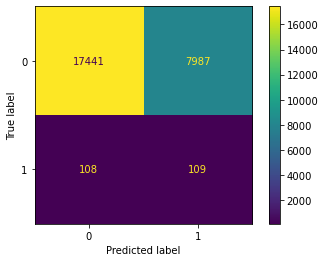

In [770]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,sklogreg.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sklogreg.classes_)
disp.plot()
plt.show()

AUC Score for logreg 0.64
AUC Score for knn 0.51
AUC Score for gaussian 0.63
AUC Score for decision_tree 0.59
AUC Score for random_forest 0.67
AUC Score for Neural_Network 0.57
AUC Score for Adaboost 0.67


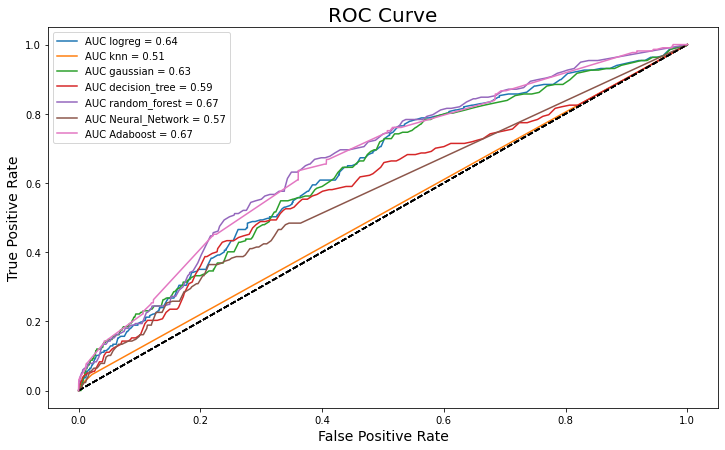

In [771]:
# Calculate and plot ROC curve and AUC Score
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(12, 7))
for model in models:
    x =  models[model].predict_proba(X_test)[:, 1]
    y = roc_auc_score(Y_test, x)
    fpr, tpr, thresholds = roc_curve(Y_test, x)
    print('AUC Score for', model, round(y,2)) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'AUC {model} = {y:.2f}')
    plt.title('ROC Curve', size=20)
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend()

# **Model evaluation**
### For each algorithm plot the following :

*   Lift curve
*   Cumulative response
*   Cumulative gains



In [772]:
performances = {}

for model in models:
    predictions   = models[model].predict(X_train)
    probabilities = DataFrame(models[model].predict_proba(X_train)[1])
    accuracy      = accuracy_score(Y_train,predictions)
    # auc           = roc_auc_score(array(Y_train),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy}

In [773]:
DataFrame(performances)

logreg       knn  gaussian  decision_tree  random_forest  \
Accuracy  0.675718  0.973046  0.953748       0.980214       0.980214   

          Neural_Network  Adaboost  
Accuracy        0.972759   0.97448

In [774]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(Y_test).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(X_test))[1]
    lifts[model] = lift(dataSet = data, actuals = "donated_7244", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "donated_7244", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "donated_7244", probability = "proba "+str(model))
    lifts[model]["Quantile"] = 1 - lifts[model]["Quantile"]
    responses[model]["Quantile"] = 1 - responses[model]["Quantile"]
    gains[model]["Quantile"] = 1 - gains[model]["Quantile"]

In [775]:
data[data['proba logreg'] > 0.7]

donated_7244  proba logreg  proba knn  proba gaussian  \
17                0      0.838245   0.000000        0.174609   
24                0      0.740891   0.000000        0.036451   
25                0      0.705626   0.000000        0.028902   
54                0      0.747605   0.000000        0.038270   
57                0      0.780932   0.000000        0.217624   
...             ...           ...        ...             ...   
25571             0      0.706602   0.000000        0.120522   
25573             0      0.760683   0.333333        0.042281   
25578             0      0.807380   0.000000        0.471520   
25591             0      0.840443   0.000000        0.793753   
25620             0      0.785418   0.000000        0.052056   

       proba decision_tree  proba random_forest  proba Neural_Network  \
17                0.000000             0.010000              0.019052   
24                0.085714             0.085649              0.074141   
25                0.048387             0.050256              0.062574   
54                0.081633             0.080411              0.076680   
57                0.000000             0.000000              0.019052   
...                    ...                  ...                   ...   
25571             0.000000             0.130000              0.019052   
25573             0.159091             0.160306              0.081996   
25578             0.000000             0.000000              0.019052   
25591             1.000000             0.230000              0.019052   
25620             0.142857             0.134460              0.093647   

       proba Adaboost  
17           0.494731  
24           0.493925  
25           0.493925  
54           0.493925  
57           0.487299  
...               ...  
25571        0.487767  
25573        0.494605  
25578        0.491019  
25591        0.495380  
25620        0.494605  

[2210 rows x 8 columns]

In [776]:
lifts["logreg"].head(50)

Quantile      Lift  Base
19      0.00  2.429539   1.0
18      0.05  1.923440   1.0
17      0.10  1.721352   1.0
16      0.15  1.684482   1.0
15      0.20  1.716985   1.0
14      0.25  1.643518   1.0
13      0.30  1.531232   1.0
12      0.35  1.513801   1.0
11      0.40  1.442589   1.0
10      0.45  1.443779   1.0
9       0.50  1.410754   1.0
8       0.55  1.319004   1.0
7       0.60  1.253970   1.0
6       0.65  1.213170   1.0
5       0.70  1.173564   1.0
4       0.75  1.139758   1.0
3       0.80  1.085154   1.0
2       0.85  1.044940   1.0
1       0.90  1.008769   1.0
0       0.95  1.000000   1.0

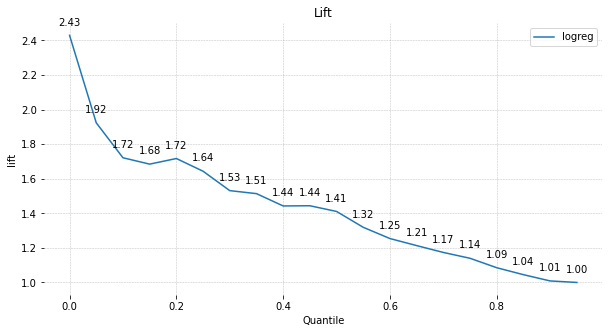

In [777]:
# plotting lifts for logistic

fig, ax = plt.subplots(figsize=(10, 5))
x_log = lifts['logreg']["Quantile"]
y_log = lifts['logreg']["Lift"]
plt.plot(x_log,y_log , label = 'logreg')
plt.xlabel("Quantile")
plt.ylabel("lift")
plt.title("Lift")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha = 0.5)
for x,y in zip(x_log,y_log):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend()

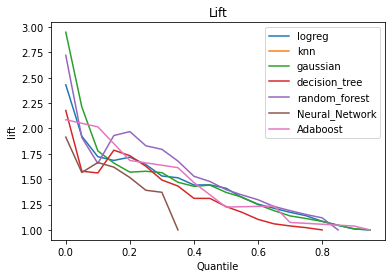

In [778]:
# Plot for lifts of all models
for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"])
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")
    pyplot.legend(models)

# Cummulative Responses

In [779]:
responses["logreg"]

Quantile  Cumulative response  Average response
19      0.00             0.020558          0.008462
18      0.05             0.016276          0.008462
17      0.10             0.014566          0.008462
16      0.15             0.014254          0.008462
15      0.20             0.014529          0.008462
14      0.25             0.013907          0.008462
13      0.30             0.012957          0.008462
12      0.35             0.012809          0.008462
11      0.40             0.012207          0.008462
10      0.45             0.012217          0.008462
9       0.50             0.011937          0.008462
8       0.55             0.011161          0.008462
7       0.60             0.010611          0.008462
6       0.65             0.010265          0.008462
5       0.70             0.009930          0.008462
4       0.75             0.009644          0.008462
3       0.80             0.009182          0.008462
2       0.85             0.008842          0.008462
1       0.90             0.008536          0.008462
0       0.95             0.008462          0.008462

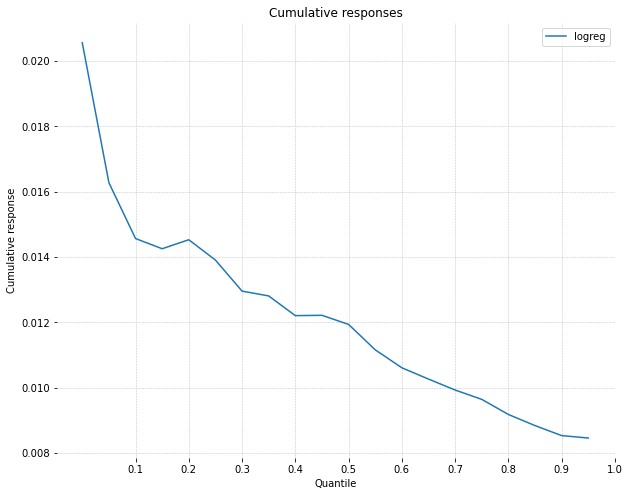

In [780]:
#plotting cumulative responses for logistic
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(responses["logreg"]["Quantile"], responses["logreg"]["Cumulative response"],
            label = "logreg")
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks(ticks=np.arange(0.1,1.1,0.1))
plt.xlabel("Quantile")
plt.ylabel("Cumulative response")
plt.title("Cumulative responses")
plt.legend()

# Gains

In [781]:
gains["logreg"]

Quantile  Cumulative gains  Base
19      0.00          0.129032  1.00
18      0.05          0.198157  0.95
17      0.10          0.267281  0.90
16      0.15          0.350230  0.85
15      0.20          0.433180  0.80
14      0.25          0.493088  0.75
13      0.30          0.539171  0.70
12      0.35          0.608295  0.65
11      0.40          0.649770  0.60
10      0.45          0.728111  0.55
9       0.50          0.783410  0.50
8       0.55          0.801843  0.45
7       0.60          0.829493  0.40
6       0.65          0.857143  0.35
5       0.70          0.880184  0.30
4       0.75          0.917051  0.25
3       0.80          0.930876  0.20
2       0.85          0.949309  0.15
1       0.90          0.967742  0.10
0       0.95          1.000000  0.05

# Probability



In [782]:
real_dummies.head()

donorID  province_Brussels  province_East Flanders  \
0   134242                  0                       0   
1   126503                  0                       0   
2   104392                  0                       0   
3   105905                  0                       0   
4   120506                  0                       0   

   province_Flemish Brabant  province_Hainaut  province_Liege  \
0                         0                 0               0   
1                         0                 0               1   
2                         0                 0               1   
3                         0                 0               0   
4                         0                 0               0   

   province_Limburg  province_Luxembourg  province_Namur  \
0                 1                    0               0   
1                 0                    0               0   
2                 0                    0               0   
3                 0                    0               0   
4                 0                    0               0   

   province_Walloon Brabant  ...  language_FR  language_NL  age  recency  \
0                         0  ...            0            1   53        0   
1                         0  ...            1            0   70        0   
2                         0  ...            1            0   45        0   
3                         0  ...            0            1   49        2   
4                         0  ...            0            1   46        0   

   No_of_campaigns  Total_Amount  Average_Amount  Maximum_Amount  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                2           210              70             100   
4                0             0               0               0   

   Minimum_Amount  donated_7244  
0               0             0  
1               0             0  
2               0             0  
3              55             1  
4               0             0  

[5 rows x 25 columns]

In [783]:
#Calculate the probability and target
donor_scoring_file = real_dummies
donor_scoring_file['probability'] = pd.DataFrame(sklogreg.predict_proba(donor_scoring_file[selectedFeatures]))[1]
donor_scoring_file['donate_7662'] = pd.DataFrame(sklogreg.predict(donor_scoring_file[selectedFeatures]))
donor_scoring_file

donorID  province_Brussels  province_East Flanders  \
0       134242                  0                       0   
1       126503                  0                       0   
2       104392                  0                       0   
3       105905                  0                       0   
4       120506                  0                       0   
...        ...                ...                     ...   
26517   114719                  0                       0   
26518   134824                  0                       0   
26519   143259                  0                       0   
26520   123936                  0                       1   
26521   128576                  0                       0   

       province_Flemish Brabant  province_Hainaut  province_Liege  \
0                             0                 0               0   
1                             0                 0               1   
2                             0                 0               1   
3                             0                 0               0   
4                             0                 0               0   
...                         ...               ...             ...   
26517                         0                 0               0   
26518                         0                 0               0   
26519                         0                 0               0   
26520                         0                 0               0   
26521                         0                 0               0   

       province_Limburg  province_Luxembourg  province_Namur  \
0                     1                    0               0   
1                     0                    0               0   
2                     0                    0               0   
3                     0                    0               0   
4                     0                    0               0   
...                 ...                  ...             ...   
26517                 0                    0               0   
26518                 0                    0               0   
26519                 0                    0               0   
26520                 0                    0               0   
26521                 0                    0               0   

       province_Walloon Brabant  ...  age  recency  No_of_campaigns  \
0                             0  ...   53        0                0   
1                             0  ...   70        0                0   
2                             0  ...   45        0                0   
3                             0  ...   49        2                2   
4                             0  ...   46        0                0   
...                         ...  ...  ...      ...              ...   
26517                         0  ...   47        0                0   
26518                         0  ...   44        0                0   
26519                         0  ...   24       39                1   
26520                         0  ...   42       30                1   
26521                         0  ...   48        0                0   

       Total_Amount  Average_Amount  Maximum_Amount  Minimum_Amount  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               0               0               0   
3               210              70             100              55   
4                 0               0               0               0   
...             ...             ...             ...             ...   
26517             0               0               0               0   
26518             0               0               0               0   
26519            40              40              40              40   
26520            20              20              20              20   
26521             0               0       

In [784]:
len(donor_scoring_file[donor_scoring_file['donate_7662'] == 1])

9672

In [785]:
# Write probabilities to file
donor_scoring_file[['donorID','donate_7662', 'probability']].to_csv('Group_Scoring.csv')

# Profiling

In [786]:
# donor_profiling = donor_scoring_file[['donorID', 'probability', 'donate_7662']]
# donor_profiling = donor_scoring_file.merge(real_set, on="donorID", how="left")
# donor_profiling = donor_profiling.drop(['province_Brussels', 'province_East Flanders', 'province_Flemish Brabant', 'province_Hainaut', 'province_Liege', 'province_Limburg', 'province_Luxembourg', 'province_Namur', 'province_Walloon Brabant', 'province_West Flanders', 'region_Brussels', 'region_Flanders', 'region_Wallonia', 'gender_F', 'language_FR', 'language_NL', 'age', 'recency', 'No_of_campaigns', 'Total_Amount', 'Average_Amount', 'Maximum_Amount', 'Minimum_Amount'], axis=1)
# donor_profiling

In [787]:
# #Number of clients per age group and gender
# fig, ax = plt.subplots(figsize = (10,5))
# ax.hist(real_set.loc[donor_profiling.gender_F == 0, 'age'], bins=30, alpha=0.5, label='Males')
# ax.hist(donor_profiling.loc[donor_profiling.gender_F == 1, 'age'], bins=30, alpha=0.5, label='Females', color = 'pink')
# ax.set_title('Number of clients per age group and gender')
# ax.set_xlabel('Age')
# ax.set_ylabel('Number of donors')
# plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.legend()
# plt.show()

In [788]:
# # Number of account orders per region
# # Calculate the population per continent
# num_clients_region = donor_profiling.groupby('province')['donorID'].agg(['count'])
# num_clients_region = num_clients_region.sort_values(by='count', ascending=False)
# # Bar plot
# fig, ax = plt.subplots()
# ax.bar(num_clients_region.index, num_clients_region['count'],alpha=0.5)
# ax.set_title('Number of donors per province')
# plt.xticks(rotation='vertical')
# ax.set_xlabel('Province')
# ax.set_ylabel('Number of donors')
# plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5, alpha = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# plt.show()

# Financial Analysis

In [789]:
# Calculate the sum raised for campaign 6169
gifts6169 = gifts[gifts['campaignID'] == 6169]
gifts6169 = gifts6169.groupby('campaignID')['amount'].sum()
gifts6169

campaignID
6169.0    98653.56
Name: amount, dtype: float64

In [790]:
# Get average donation made in 7244 campaign
gifts_7244 = gifts[gifts['campaignID'] == 7244 ]
gifts_7244_avg = gifts_7244['amount'].mean()
gifts_7244_avg

51.56786703601108

In [791]:
# Calculate the sum raised for campaign 7244
gifts7244 = gifts[gifts['campaignID'] == 7244]
gifts7244 = gifts7244.groupby('campaignID')['amount'].sum()
gifts7244

campaignID
7244.0    18616.0
Name: amount, dtype: float64